<a href="https://colab.research.google.com/github/Gokul0Krishna/exp/blob/main/exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/fashion-mnist_test.zip"

Archive:  /content/fashion-mnist_test.zip
  inflating: fashion-mnist_test.csv  


In [ ]:
import pandas as pd
df=pd.read_csv('/content/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
iamge=[]
data=[]
for index, row in df.iterrows():
  img=row[1:]
  image = np.array(img,dtype=np.float32).reshape(28, 28)
  image = image / 255.0

  iamge.append(image)

  local_var = cv2.Laplacian(image, cv2.CV_32F).var()#The Laplacian operator highlights regions of rapid intensity change (edges),High variance = many strong edges = likely not occluded
  norm_var = local_var / (np.mean(image)+ 1e-6)
    # plt.imshow(image, cmap='gray')

  data.append(norm_var)

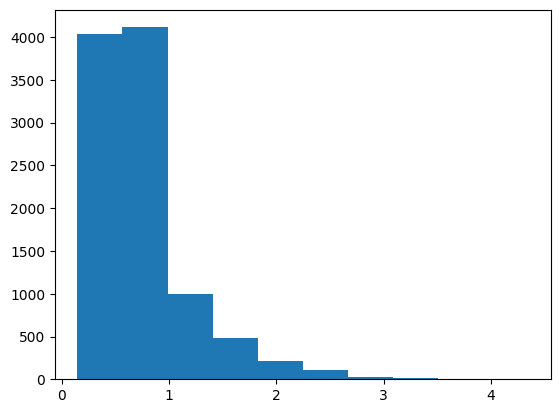

In [ ]:
plt.hist(data)
plt.show()

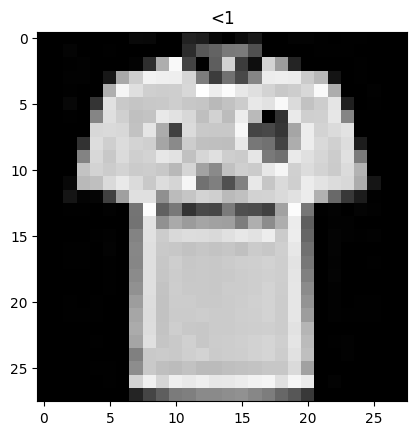

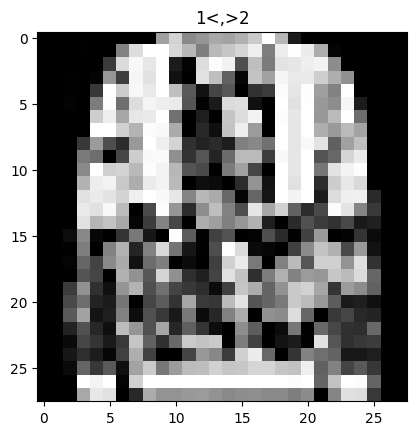

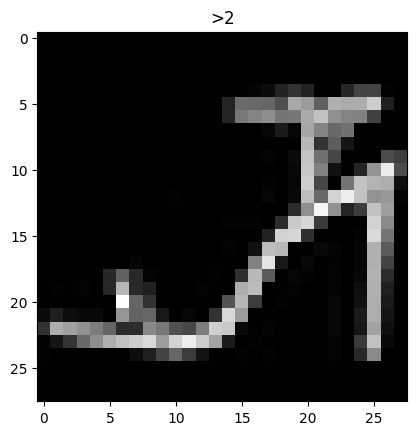

In [ ]:
l1,l2,l3=True,True,True
for i in range(len(data)):
  if l1:
    if data[i]<1:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("<1")
      plt.show()
      l1=False
  if l2:
    if data[i]>1 and data[i]<2:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("1<,>2")
      plt.show()
      l2=False
  if l3:
    if data[i]>2:
      plt.imshow(iamge[i], cmap='gray')
      plt.title(">2")
      plt.show()
      l3=False

the trigger can be if normal var>1

In [ ]:
iamge=[]
data=[]
for index, row in df.iterrows():
  img=row[1:]
  image = np.array(img,dtype=np.float32).reshape(28, 28)
  image = image / 255.0
  grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  grad_mag = np.sqrt(grad_x**2 + grad_y**2)
  grad_mag=np.mean(grad_mag)#edge density
  data.append(grad_mag)
  iamge.append(image)
  # local_var = cv2.Laplacian(grad_mag, cv2.CV_32F).var()

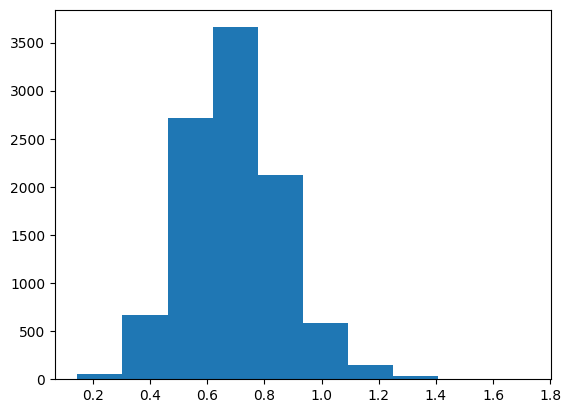

In [ ]:
plt.hist(data)
plt.show()

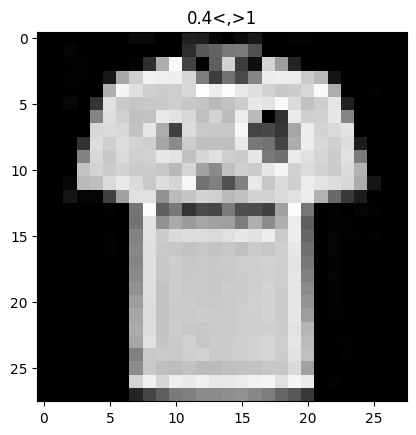

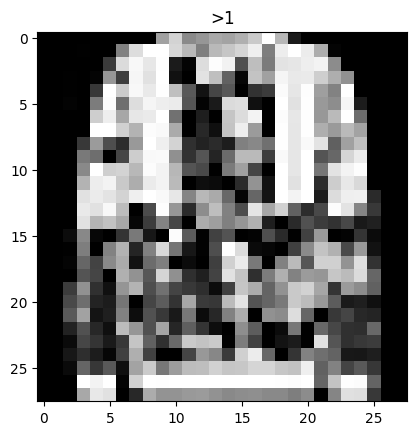

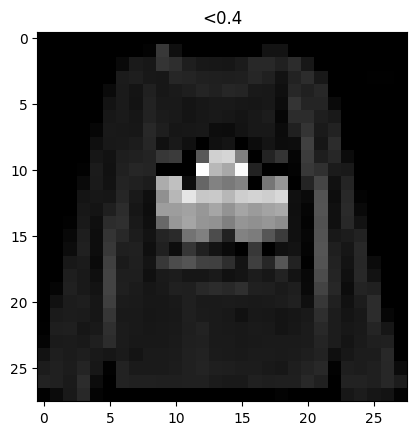

In [ ]:
l1,l2,l3=True,True,True
for i in range(len(data)):
  if l1:
    if data[i]<0.4:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("<0.4")
      plt.show()
      l1=False
  if l2:
    if data[i]>0.4 and data[i]<1:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("0.4<,>1")
      plt.show()
      l2=False
  if l3:
    if data[i]>1:
      plt.imshow(iamge[i], cmap='gray')
      plt.title(">1")
      plt.show()
      l3=False

less than one yolo, greather than one detr

In [ ]:
from skimage.feature import local_binary_pattern
iamge=[]
data=[]
for index, row in df.iterrows():
  img=row[1:]
  image = np.array(img,dtype=np.float32).reshape(28, 28)
  image = image / 255.0
  lbp = local_binary_pattern(image, 8, 1, method="uniform")#greater the no. more complex the image
  hist, _ = np.histogram(lbp, bins=8+2, range=(0, 8+2))
  hist = hist.astype(np.float32) / hist.sum()
  grad_mag=-np.sum(hist * np.log(hist + 1e-6))
  data.append(grad_mag)
  iamge.append(image)

/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


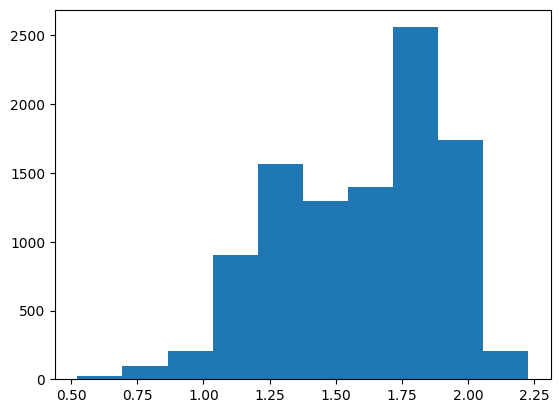

In [ ]:
plt.hist(data)
plt.show()

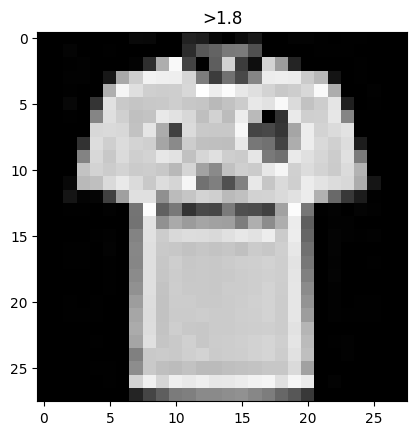

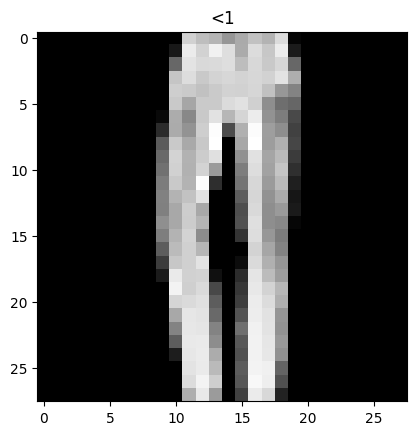

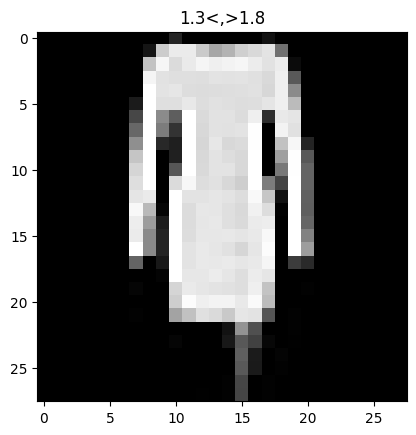

In [ ]:
l1,l2,l3=True,True,True
for i in range(len(data)):
  if l1:
    if data[i]<1.3:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("<1")
      plt.show()
      l1=False
  if l2:
    if data[i]>1.3 and data[i]<1.8:
      plt.imshow(iamge[i], cmap='gray')
      plt.title("1.3<,>1.8")
      plt.show()
      l2=False
  if l3:
    if data[i]>1.8:
      plt.imshow(iamge[i], cmap='gray')
      plt.title(">1.8")
      plt.show()
      l3=False

example code

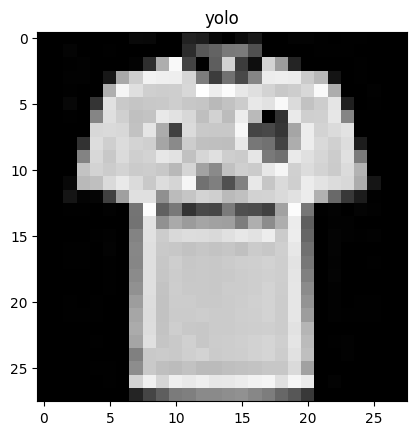

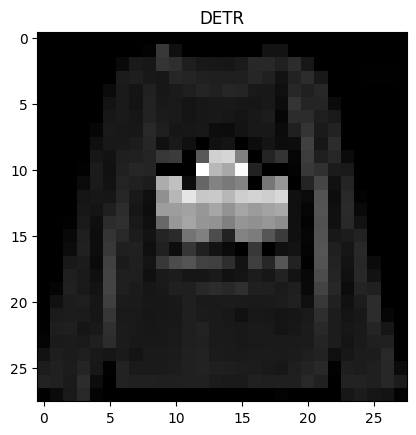

In [ ]:
l1,l2=True,True
for i in range(len(iamge)):
    if (edge_desity(iamge[i])>0.4) and (obj_found(iamge[i])<3):
      if l1:
        plt.imshow(iamge[i], cmap='gray')
        plt.title("yolo")
        plt.show()
        l1=False
    else:
      if l2:
        plt.imshow(iamge[i], cmap='gray')
        plt.title("DETR")
        plt.show()
        l2=False

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
imagelist=[]
for index, row in df.iterrows():
  img=row[1:]
  image = np.array(img,dtype=np.float32).reshape(28, 28)
  image = image / 255.0
  image=image.flatten()
  imagelist.append(image)

ndf=pd.DataFrame({
    "image":imagelist,
    "label":df["label"]
})

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(np.vstack(ndf["image"].values),ndf["label"],test_size=0.2,random_state=69)
xtest,xval,ytest,yval=train_test_split(xtest,ytest,test_size=0.5,random_state=69)

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(xtrain, ytrain)
print("Decision Tree Accuracy:", dt.score(xval, yval))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(xtrain, ytrain)
print("Random Forest Accuracy:", rf.score(xtest, ytest))

Random Forest Accuracy: 0.849


In [ ]:
xtest[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

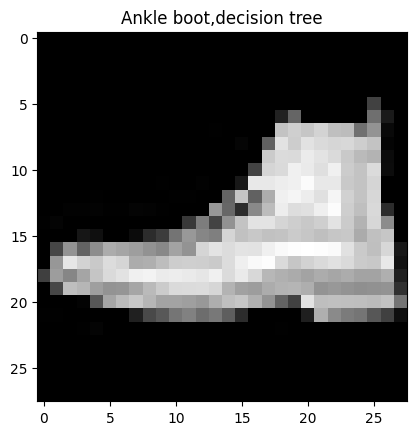

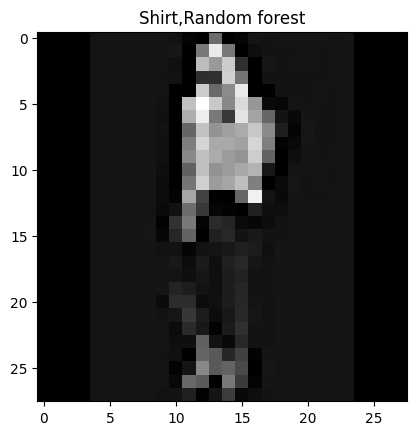

In [ ]:
l=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
l1,l2=True,True
for i in range(len(xtest)):
  img=xtest[i].reshape(28,28)
  if (edge_desity(img)>0.4) and (obj_found(img)<3):
    if l1:
      plt.imshow(img, cmap='gray')
      plt.title(f"{l[dt.predict([xtest[i]])[0]]},decision tree")
      plt.show()
      l1=False
  else:
    if l2:
      plt.imshow(img, cmap='gray')
      plt.title(f"{l[rf.predict([xtest[i]])[0]]},Random forest")
      plt.show()
      l2=False

In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: human detection dataset/0/0.png  
  inflating: human detection dataset/0/1.png  
  inflating: human detection dataset/0/10.png  
  inflating: human detection dataset/0/100.png  
  inflating: human detection dataset/0/101.png  
  inflating: human detection dataset/0/102.png  
  inflating: human detection dataset/0/103.png  
  inflating: human detection dataset/0/104.png  
  inflating: human detection dataset/0/105.png  
  inflating: human detection dataset/0/106.png  
  inflating: human detection dataset/0/107.png  
  inflating: human detection dataset/0/108.png  
  inflating: human detection dataset/0/109.png  
  inflating: human detection dataset/0/11.png  
  inflating: human detection dataset/0/110.png  
  inflating: human detection dataset/0/111.png  
  inflating: human detection dataset/0/112.png  
  inflating: human detection dataset/0/113.png  
  inflating: human detection dataset/0/114.png  
  inflating: human detection dataset/0/115.p

In [ ]:
from skimage.feature import local_binary_pattern
def er(image):
  grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  grad_mag = np.sqrt(grad_x**2 + grad_y**2)
  return np.mean(grad_mag)

def obj_found(image):
  image = (image * 255).astype(np.uint8)
  params = cv2.SimpleBlobDetector_Params()
  params.filterByArea = True
  params.minArea = 10  # Minimum blob size (adjust for small objects)
  params.maxArea = 1000
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(image)
  return len(keypoints)

def complexity(image):
  image = np.array(image).reshape(len(image), -1)
  lbp = local_binary_pattern(image, 8, 1, method="uniform")#greater the no. more complex the image
  hist, _ = np.histogram(lbp, bins=8+2, range=(0, 8+2))
  hist = hist.astype(np.float32) / hist.sum()
  grad_mag=-np.sum(hist * np.log(hist + 1e-6))
  return grad_mag

def ed(image):
  local_var = cv2.Laplacian(image, cv2.CV_32F).var()#The Laplacian operator highlights regions of rapid intensity change (edges),High variance = many strong edges = likely not occluded
  return local_var / (np.mean(image)+ 1e-6)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plotconf(cm):
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Class 0', 'Class 1'],
              yticklabels=['Class 0', 'Class 1'])
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

In [ ]:
import os
image=[]
lable=[]
for i in os.listdir("/content/human detection dataset/"):
  for j in os.listdir("/content/human detection dataset/"+i):
    image.append("/content/human detection dataset/"+i+"/"+j)
    lable.append(int(i))


In [ ]:
iamge=[]
import numpy as np
from PIL import Image
for i in image:
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    iamge.append(img)

label=np.array(lable).flatten()

In [ ]:
import pandas as pd
ndf=pd.DataFrame({
    "image":iamge,
    "label":lable
})

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(np.stack(df['image'].values), ndf['label'].values, test_size=0.2, random_state=42)
xtest,xval,ytest,yval=train_test_split(xtest,ytest,test_size=0.5, random_state=42)

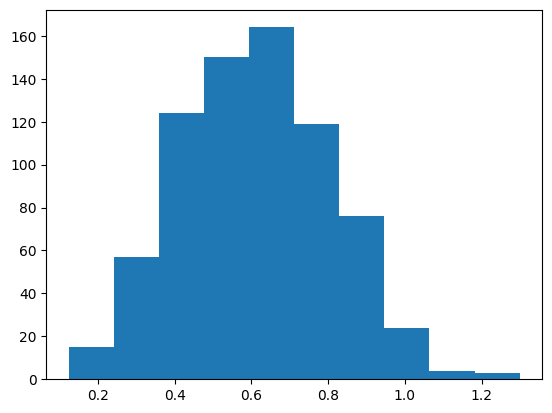

In [ ]:
data=[]
for i in xtrain:
    data.append(er(i))
plt.hist(data)
plt.show()

In [ ]:
emean=np.mean(data)
np.median(data)

np.float64(0.6072190025592866)

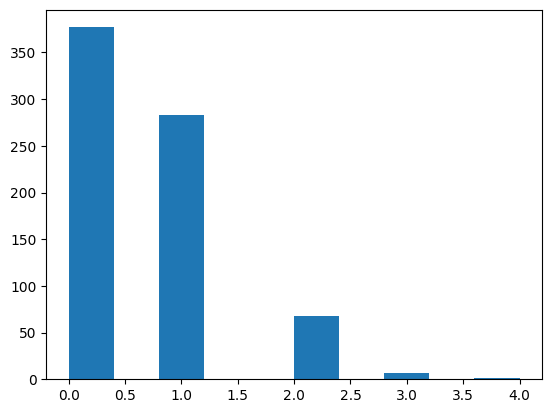

In [ ]:
data=[]
for i in xtrain:
    data.append(obj_found(i))
plt.hist(data)
plt.show()

In [ ]:
omean=np.mean(data)
np.median(data)

np.float64(0.0)

In [ ]:
xtrain = np.array(xtrain).reshape(len(xtrain), -1)
xtest = np.array(xtest).reshape(len(xtest), -1)
xval = np.array(xval).reshape(len(xval), -1)

Decision Tree Accuracy: 0.6451612903225806
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.71      0.75      0.73        60

    accuracy                           0.65        93
   macro avg       0.61      0.60      0.60        93
weighted avg       0.64      0.65      0.64        93



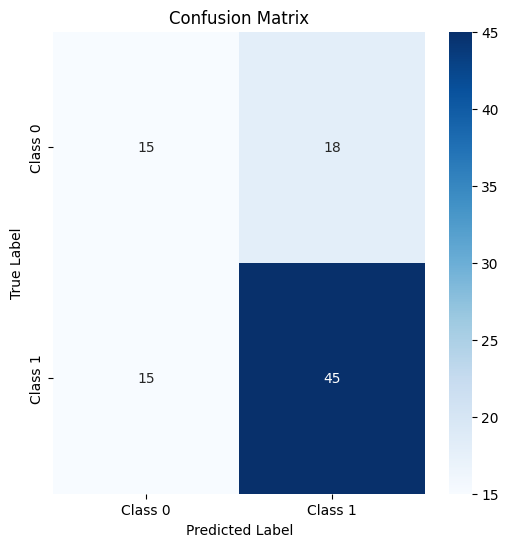

Random Forest Accuracy: 0.6559139784946236
              precision    recall  f1-score   support

           0       0.56      0.15      0.24        33
           1       0.67      0.93      0.78        60

    accuracy                           0.66        93
   macro avg       0.61      0.54      0.51        93
weighted avg       0.63      0.66      0.59        93



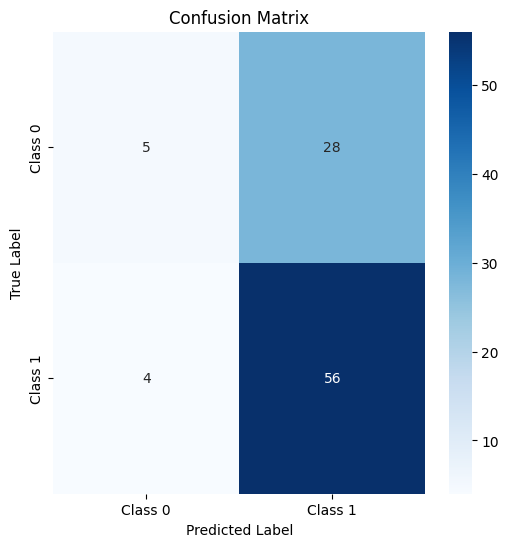

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(xtrain, ytrain)
y_pred_dt = dt.predict(xval)
print("Decision Tree Accuracy:", accuracy_score(yval, y_pred_dt))
print(classification_report(yval, y_pred_dt))
plotconf(confusion_matrix(yval, y_pred_dt))


rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xval)
print("Random Forest Accuracy:", accuracy_score(yval, y_pred_rf))
print(classification_report(yval, y_pred_rf))
plotconf(confusion_matrix(yval, y_pred_rf))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40        39
           1       0.59      0.68      0.63        53

    accuracy                           0.54        92
   macro avg       0.52      0.52      0.52        92
weighted avg       0.53      0.54      0.53        92



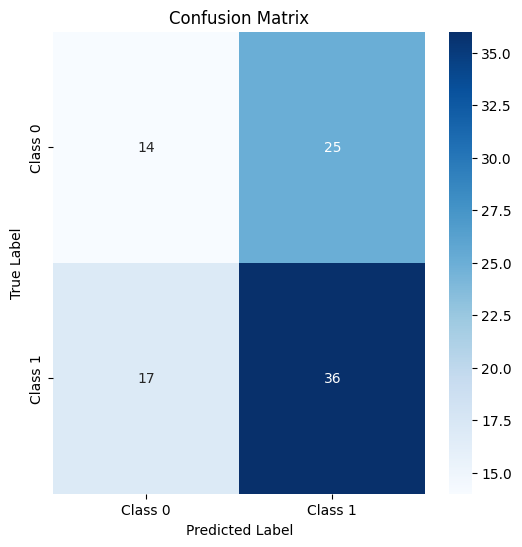

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

y_pred_dt = dt.predict(xtest)
print(classification_report(ytest, y_pred_dt))
plotconf(confusion_matrix(ytest, y_pred_dt))


              precision    recall  f1-score   support

           0       0.78      0.36      0.49        39
           1       0.66      0.92      0.77        53

    accuracy                           0.68        92
   macro avg       0.72      0.64      0.63        92
weighted avg       0.71      0.68      0.65        92



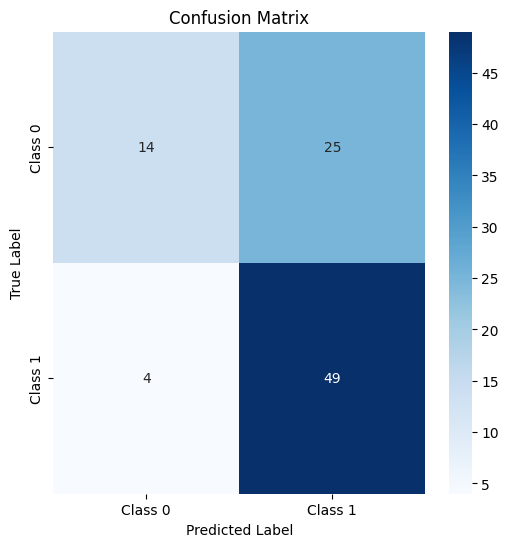

In [ ]:
y_pred_rf = rf.predict(xtest)
print(classification_report(ytest, y_pred_rf))
plotconf(confusion_matrix(ytest, y_pred_rf))

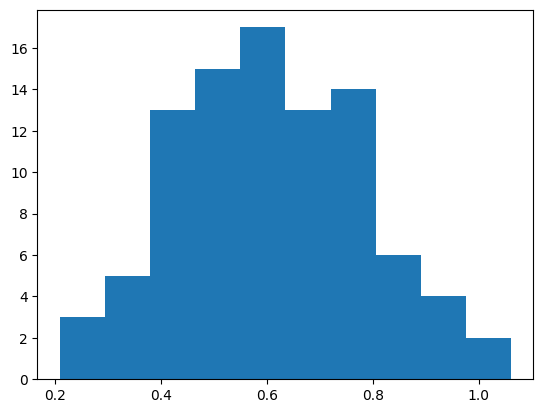

In [ ]:
data=[]
for i in range(len(xtest)):
    data.append(er(xtest[i].reshape(28,28)))
plt.hist(data)
plt.show()

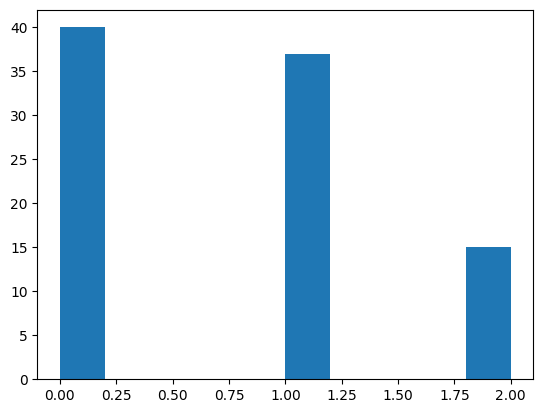

In [ ]:
data=[]
for i in range(len(xtest)):
    data.append(obj_found(xtest[i].reshape(28,28)))
plt.hist(data)
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        39
           1       0.65      0.81      0.72        53

    accuracy                           0.64        92
   macro avg       0.63      0.61      0.61        92
weighted avg       0.64      0.64      0.63        92

random_forest= 47 decision_tree= 45


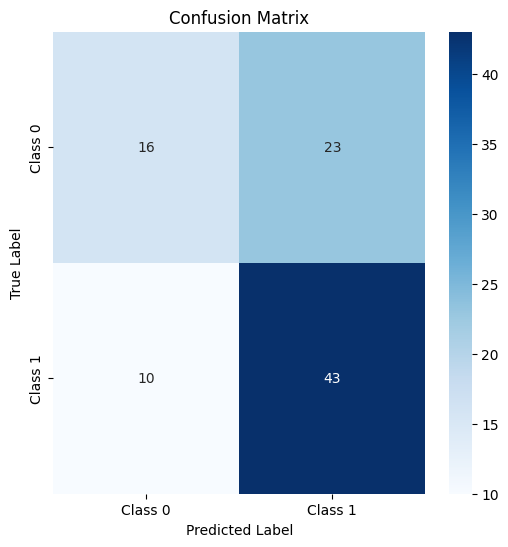

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pred=[]
a,b=0,0
for i in range(len(xtest)):
  img=xtest[i].reshape(28,28)
  if (er(img)<emean):# or obj_found(img)>omean
      pred.append(rf.predict([xtest[i]])[0])
      a+=1
  else:
      pred.append(dt.predict([xtest[i]])[0])
      b+=1

print(classification_report(ytest,pred))
print("random_forest=",a,"decision_tree=",b)
plotconf(confusion_matrix(ytest, pred))